<a href="https://colab.research.google.com/github/DmitriySutyagin/Data-collection-and-markup/blob/main/Lesson_8_Working_with_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Lesson_8.Working_with_data/train.csv')


Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [4]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
is_null = df.isnull().sum()
is_null

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# Deleting columns with a missing data percentage of more than 50%
df.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis= 1, inplace= True)

In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
# Creating a function for filling NaN values with popular values

def NaN_mode_conversion(field_name):
  "This function replaces NaN with the popular field value"

  mode_field_name = df[field_name].mode()[0]
  df[field_name] = df[field_name].fillna(mode_field_name)
  return df[field_name]

In [9]:
# Replacing NaN values in the for loop

for field_name in ['MasVnrArea',  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
  NaN_mode_conversion(field_name)

In [10]:
# Filling the LotFrontage column with average values because it is close to the median value
median_LotFrontage = df['LotFrontage'].median()
mean_LotFrontage = df['LotFrontage'].mean()
df['LotFrontage'] = df['LotFrontage'].fillna(mean_LotFrontage)

In [11]:
# Replacing NaN values in the GarageYrBlt field

mode_GarageYrBlt = df['GarageYrBlt'].mean()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(mode_GarageYrBlt)

In [12]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [13]:
df.loc[df['Street'] == 'Pave', 'Street'] = 0
df.loc[df['Street'] == 'Grvl', 'Street'] = 1

Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

In [14]:
apps = df[['SalePrice', 'GarageArea', 'GarageCars', 'GarageQual', 'GarageCond']]
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SalePrice   1460 non-null   int64 
 1   GarageArea  1460 non-null   int64 
 2   GarageCars  1460 non-null   int64 
 3   GarageQual  1460 non-null   object
 4   GarageCond  1460 non-null   object
dtypes: int64(3), object(2)
memory usage: 57.2+ KB


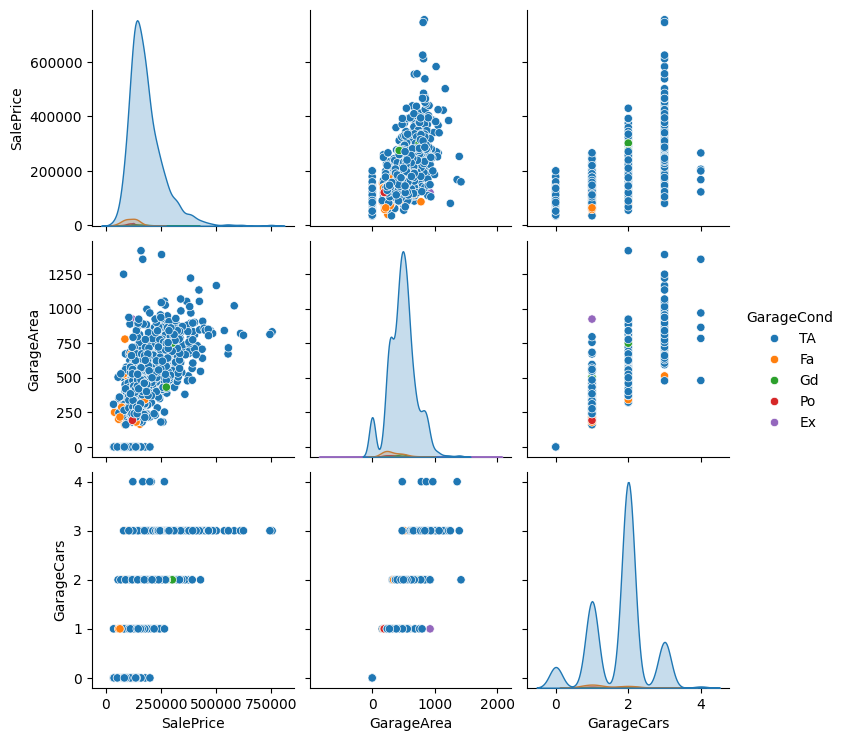

In [15]:
sns.pairplot(apps, hue='GarageCond')

In this diagram there are garages with zero floor space.

In [16]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice'>

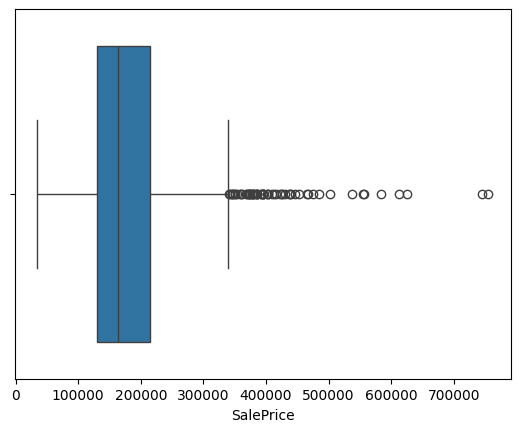

In [17]:
sns.boxplot(x=df["SalePrice"])

This boxplot clearly shows emissions at a price of 350,000.

<Axes: xlabel='SalePrice', ylabel='Count'>

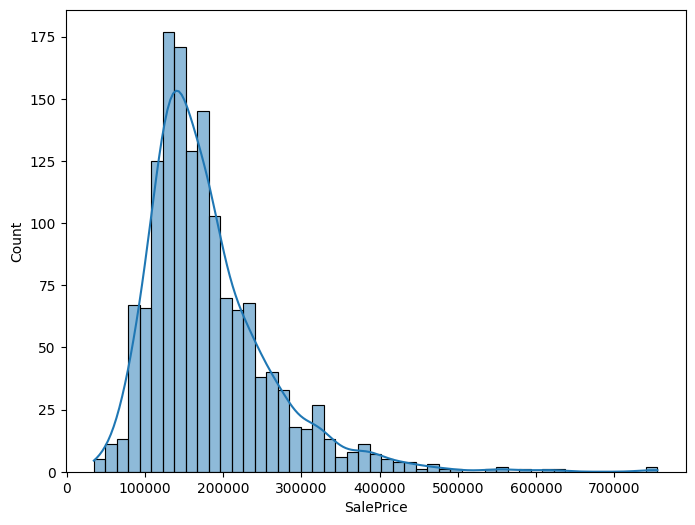

In [18]:
# the histogram Sale Price
f, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True)

The distribution is lognormal

<Axes: xlabel='OverallQual', ylabel='Count'>

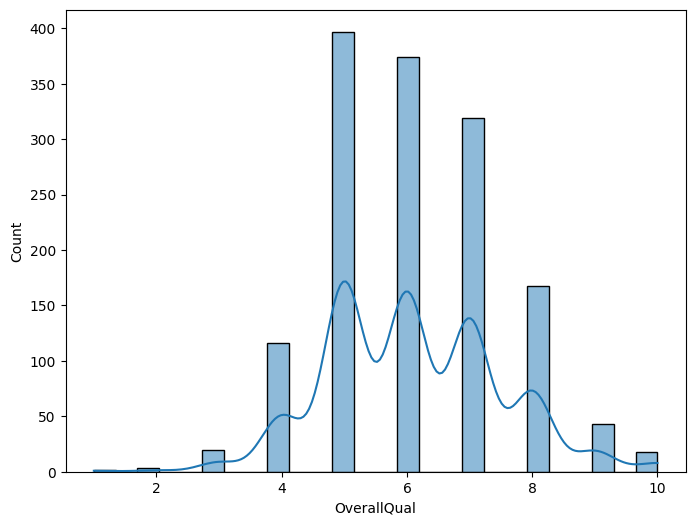

In [19]:
# the histogram Overall Qual
f, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['OverallQual'], kde=True)

<Axes: xlabel='GrLivArea', ylabel='Count'>

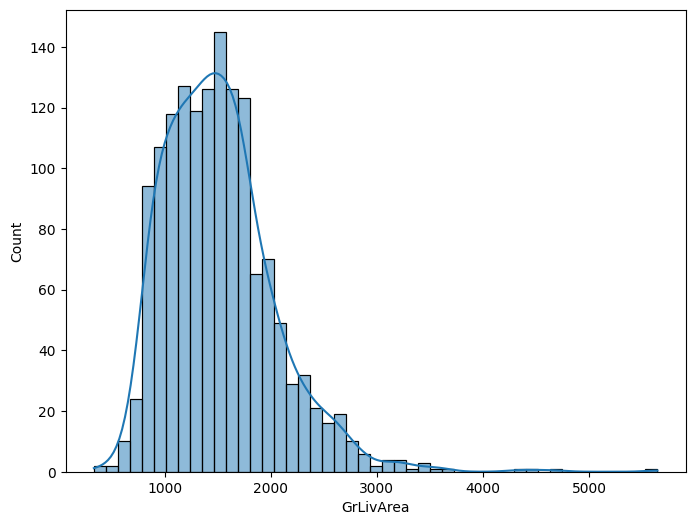

In [20]:
# the histogram GrLiv Area
f, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['GrLivArea'], kde=True)

<Axes: xlabel='GarageCars', ylabel='Count'>

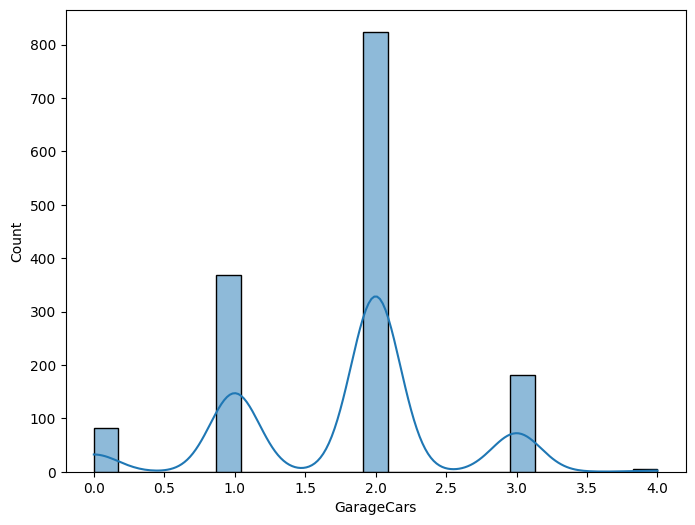

In [21]:
# the histogram Garage Cars
f, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['GarageCars'], kde=True)

In [22]:
# Calculating the Z-score for the "SalePrice" column
z = np.abs(stats.zscore(df['SalePrice']))

# Setting the Z-score threshold
threshold = 3

# Detection of outliers based on Z-score
outliers = df['SalePrice'][z > threshold]

# Replacing the indices with the median value
df.loc[z > threshold, 'SalePrice'] = df['SalePrice'].median()

In [23]:
# Рandling emissions
df.loc[df['GarageCars'] == 0, 'GarageCars'] = 1
df.loc[df['GarageArea'] >= 1250, 'GarageArea'] = df['GarageArea'].mean()
df.loc[df['GarageArea'] == 0, 'GarageArea'] = df['GarageArea'].mean()

In [24]:
apps = df[['SalePrice', 'GarageArea', 'GarageCars', 'GarageQual', 'GarageCond']]
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SalePrice   1460 non-null   int64  
 1   GarageArea  1460 non-null   float64
 2   GarageCars  1460 non-null   int64  
 3   GarageQual  1460 non-null   object 
 4   GarageCond  1460 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 57.2+ KB


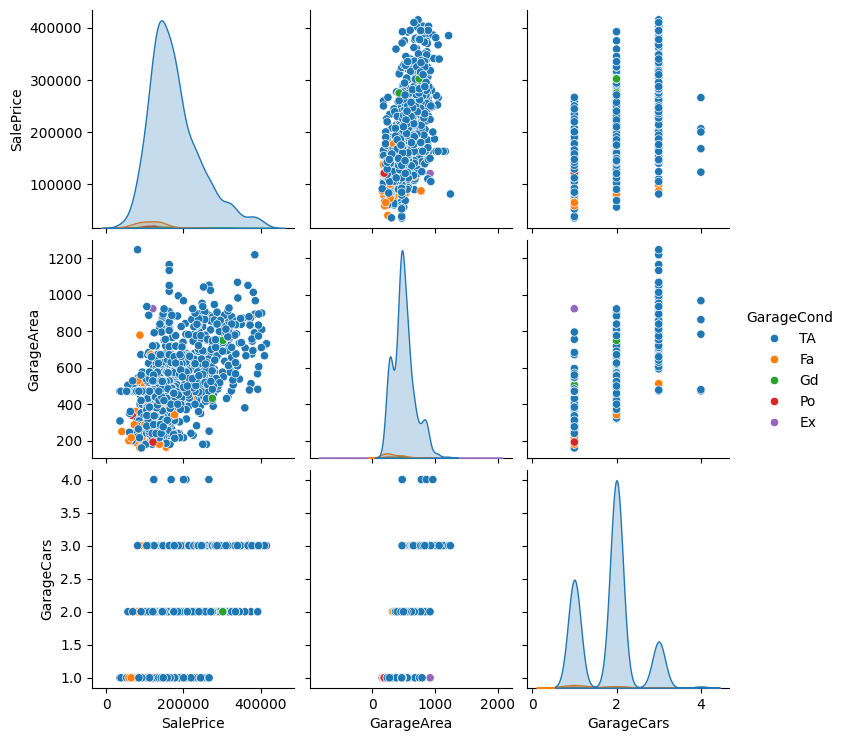

In [25]:
import seaborn as sns
sns.pairplot(apps, hue='GarageCond')

<Axes: xlabel='SalePrice'>

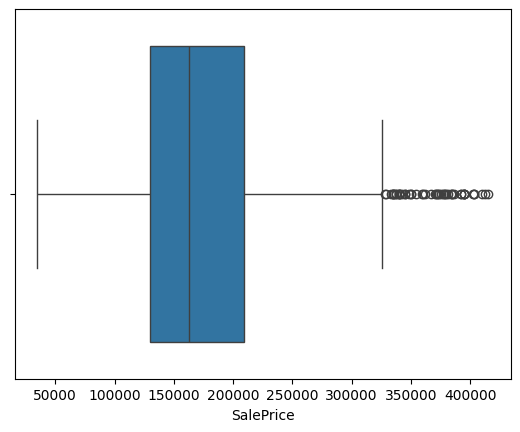

In [26]:
sns.boxplot(x=df["SalePrice"])

In [35]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,0,1,0,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,1,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,1,0,0,2,0,...,272,0,0,0,0,2,2006,0,1,140000
4,60,0,84.0,14260,0,1,0,0,1,0,...,0,0,0,0,0,12,2008,0,0,250000


In [28]:
# Replacing string values with unique numeric values
for field_name in list(df):
  if isinstance(df[field_name].unique()[0], str):
    for item, i in enumerate(list(df[field_name].unique())):
      if isinstance(i, str):
        df.loc[df[field_name] == i, field_name] = int(item)

In [34]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,0,1,0,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,1,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,1,0,0,2,0,...,272,0,0,0,0,2,2006,0,1,140000
4,60,0,84.0,14260,0,1,0,0,1,0,...,0,0,0,0,0,12,2008,0,0,250000


<Axes: >

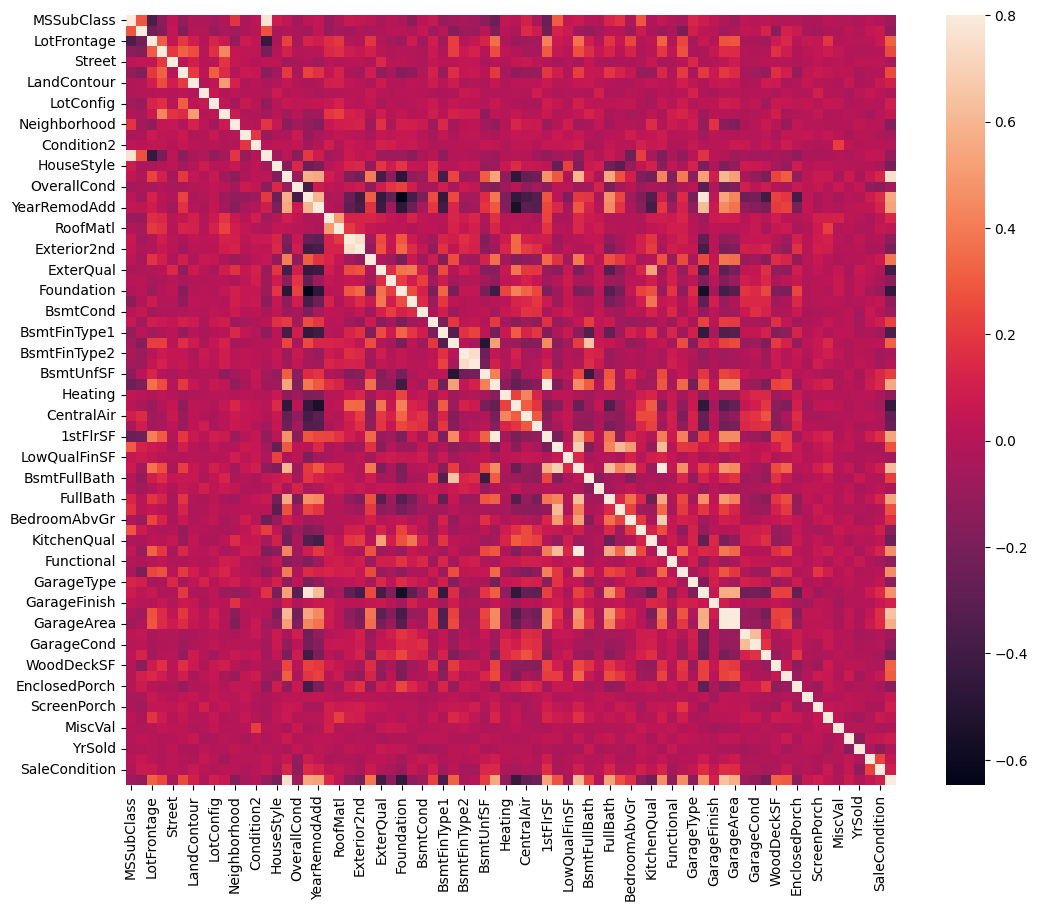

In [30]:
# Correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

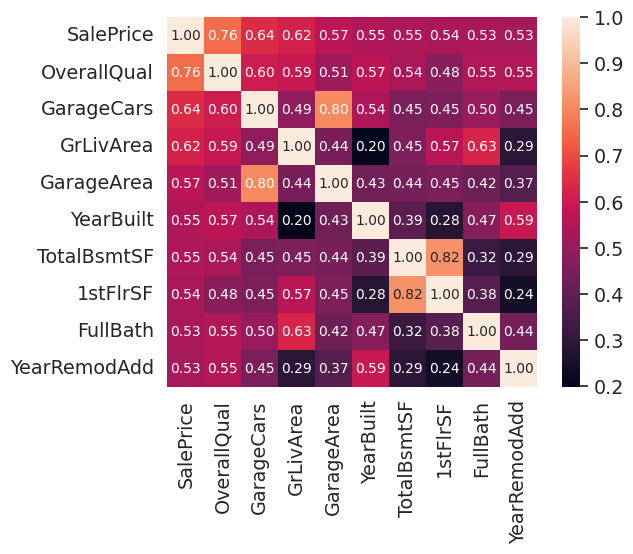

In [31]:
corrmat = df.corr()
k = 10 # the number of correlating features we want to see
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

This heat map shows the best value for sale and overall quality.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [39]:
df.to_csv('cleaned_house_prices.csv')